In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torch.nn as nn
from sklearn.metrics import f1_score
import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn as nn

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 78% 49.0M/62.6M [00:00<00:00, 169MB/s]
100% 62.6M/62.6M [00:00<00:00, 163MB/s]


In [ ]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
# Wczytanie plików CSV do DataFrame
from sklearn.model_selection import train_test_split

temp_df = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
temp_df = temp_df.dropna()
X_temp = temp_df.drop('label', axis=1)
y_temp = temp_df['label']

test_df = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')
test_df = test_df.dropna()
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [ ]:
print(temp_df.head(10))

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   
5     16     161     168     172     173     178     184     189     193   
6      8     134     134     135     135     136     137     137     138   
7     22     114      42      74      99     104     109     117     127   
8      3     169     174     176     180     183     185     187     188   
9      3     189     189     189     190     190     191     190     190   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     1

In [ ]:
print(X_temp.shape)
print(y_temp.shape)
print(X_test.shape)
print(y_test.shape)

(27455, 784)
(27455,)
(7172, 784)
(7172,)


In [ ]:
X_train = X_temp[:20445]
y_train = y_temp[:20445]
X_valid = X_temp[20445:20445+7000]
y_valid = y_temp[20445:20445+7000]

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(20445, 784)
(20445,)
(7000, 784)
(7000,)


In [ ]:
print(X_valid)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
20445     130     134     139     144     147     150     152     154     157   
20446      72      83      94     103     113     120     122     126     133   
20447     167     168     168     168     168     167     166     166     165   
20448     172     175     176     180     182     184     183     185     187   
20449     126     129     133     136     137     140     143     145     147   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27440     174     177     179     181     183     184     185     188     193   
27441     138     140     142     146     151     156     159     163     164   
27442     181     182     181     181     181     180     180     180     180   
27443     190     191     194     198     198     198     198     199     200   
27444     148     151     154     159     162     165     168     170     172   

       pixel10  ...  pixel7

In [ ]:
X_valid = X_valid.reset_index(drop = True)
print(X_valid)

      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0        130     134     139     144     147     150     152     154     157   
1         72      83      94     103     113     120     122     126     133   
2        167     168     168     168     168     167     166     166     165   
3        172     175     176     180     182     184     183     185     187   
4        126     129     133     136     137     140     143     145     147   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
6995     174     177     179     181     183     184     185     188     193   
6996     138     140     142     146     151     156     159     163     164   
6997     181     182     181     181     181     180     180     180     180   
6998     190     191     194     198     198     198     198     199     200   
6999     148     151     154     159     162     165     168     170     172   

      pixel10  ...  pixel775  pixel776 

In [ ]:
print(y_test)

0        6
1        5
2       10
3        0
4        3
        ..
7167     1
7168    12
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64


In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [ ]:
import torch

# Konwertujemy dane na tensory
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).view(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32).view(-1, 1, 28, 28)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).view(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Tworzymy obiekty TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Tworzymy obiekty DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

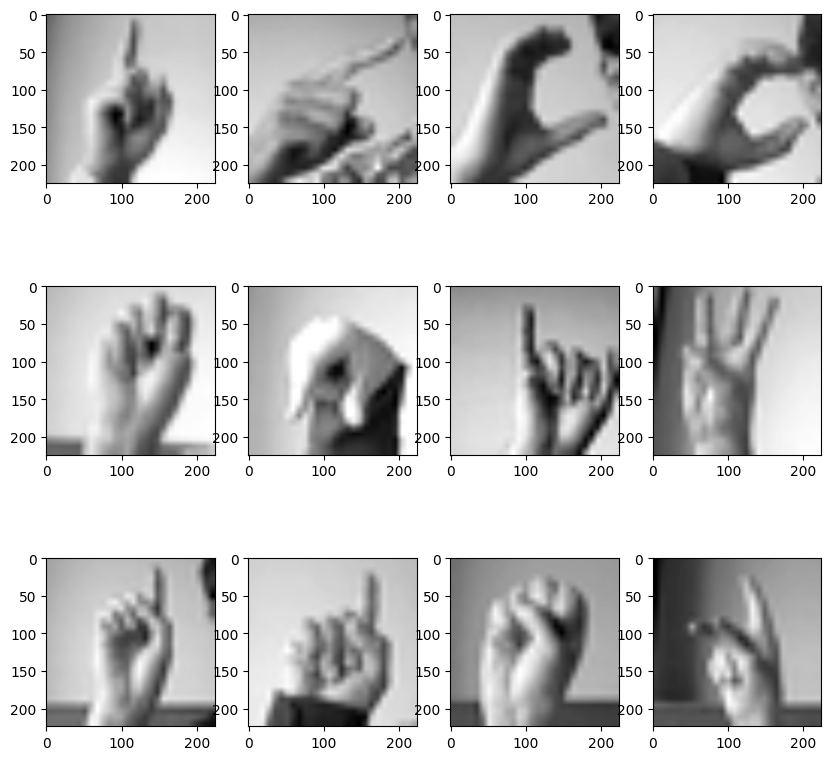

In [ ]:
text="pixel"
images=torch.zeros((temp_df.shape[0],1))
for i in range(1,785):
    temp_text=text+str(i)
    temp=temp_df[temp_text]
    temp=torch.FloatTensor(temp).unsqueeze(1)
    images=torch.cat((images,temp),1)
images_final=torch.FloatTensor(images[:,1:]).view(-1,28,28)

fig=plt.figure(figsize=(10,10))
columns=3
rows=4
for i in range(12):
    img=images_final[i,:]
    img=img.numpy()
    img=cv2.resize(img,(224,224))
    fig.add_subplot(columns, rows, i + 1)
    plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

In [ ]:
# sprawdzenie czy zgadzają się wymiary
x = torch.ones((12, 1, 28, 28))
model(x).shape

torch.Size([12, 64, 7, 7])

In [ ]:
# warstwa spłaszczająca
model.add_module('flatten', nn.Flatten())

In [ ]:
model.add_module('fc1', nn.Linear(3136, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))

model.add_module('fc2', nn.Linear(1024, 25))  # 25 dla 25 etykiet

In [ ]:
device = torch.device("cpu")

model = model.to(device)

In [ ]:
# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist = train(model, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.6421 val_accuracy: 0.9644
Epoch 2 accuracy: 0.9552 val_accuracy: 0.9851
Epoch 3 accuracy: 0.9744 val_accuracy: 0.9987
Epoch 4 accuracy: 0.9819 val_accuracy: 0.9979
Epoch 5 accuracy: 0.9792 val_accuracy: 0.9930
Epoch 6 accuracy: 0.9810 val_accuracy: 0.9987
Epoch 7 accuracy: 0.9844 val_accuracy: 0.9997
Epoch 8 accuracy: 0.9828 val_accuracy: 0.9691
Epoch 9 accuracy: 0.9884 val_accuracy: 0.9967
Epoch 10 accuracy: 0.9840 val_accuracy: 0.9996


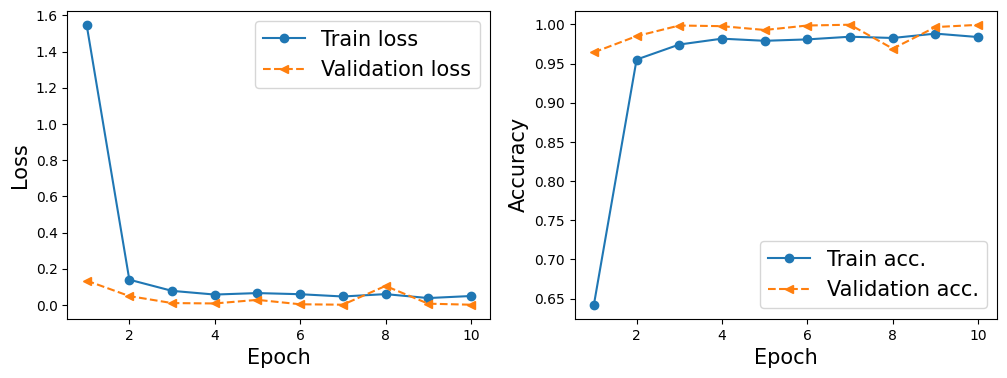

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
def evaluate(model, data_loader):
    model.eval()
    loss_hist = 0
    accuracy_hist = 0
    with torch.no_grad():
        for x_batch, y_batch in data_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss_hist += loss.item() * y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist += is_correct.sum().cpu().item()

    loss_hist /= len(data_loader.dataset)
    accuracy_hist /= len(data_loader.dataset)

    return loss_hist, accuracy_hist

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.9323, Test Accuracy: 0.8716


## Model 1 - zmieniamy learning rate na 0.01

In [ ]:
model1 = nn.Sequential()
model1.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model1.add_module('relu1', nn.ReLU())
model1.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model1.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model1.add_module('relu2', nn.ReLU())
model1.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model1.add_module('flatten', nn.Flatten())

model1.add_module('fc1', nn.Linear(3136, 1024))
model1.add_module('relu3', nn.ReLU())
model1.add_module('dropout', nn.Dropout(p=0.5))

model1.add_module('fc2', nn.Linear(1024, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model1 = model1.to(device)

In [ ]:
# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist1 = train(model1, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.0485 val_accuracy: 0.0466
Epoch 2 accuracy: 0.0447 val_accuracy: 0.0431
Epoch 3 accuracy: 0.0453 val_accuracy: 0.0496
Epoch 4 accuracy: 0.0444 val_accuracy: 0.0464
Epoch 5 accuracy: 0.0455 val_accuracy: 0.0496
Epoch 6 accuracy: 0.0425 val_accuracy: 0.0464
Epoch 7 accuracy: 0.0445 val_accuracy: 0.0496
Epoch 8 accuracy: 0.0433 val_accuracy: 0.0451
Epoch 9 accuracy: 0.0465 val_accuracy: 0.0464
Epoch 10 accuracy: 0.0449 val_accuracy: 0.0469


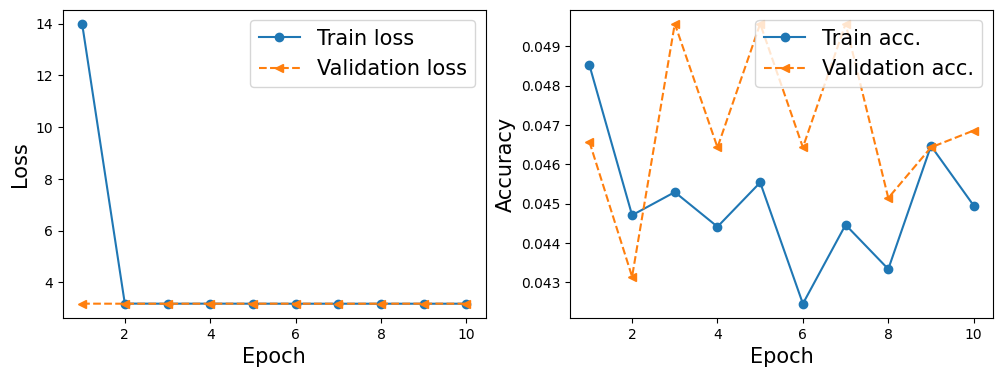

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist1[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist1[0], '-o', label='Train loss')
ax.plot(x_arr, hist1[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist1[2], '-o', label='Train acc.')
ax.plot(x_arr, hist1[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)


plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model1, test_loader)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 3.2035, Test Accuracy: 0.0201


## Model 2 - zmieniamy ReLu na LeakyReLu

In [ ]:
model2 = nn.Sequential()
model2.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model2.add_module('relu1', nn.ReLU())
model2.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model2.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model2.add_module('relu2', nn.ReLU())
model2.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model2.add_module('flatten', nn.Flatten())

model2.add_module('fc1', nn.Linear(3136, 1024))
model2.add_module('leaky_relu3', nn.LeakyReLU(0.1))
model2.add_module('dropout', nn.Dropout(p=0.5))

model2.add_module('fc2', nn.Linear(1024, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model2 = model2.to(device)

In [ ]:
# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist2 = train(model2, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.6278 val_accuracy: 0.9387
Epoch 2 accuracy: 0.9511 val_accuracy: 0.9847
Epoch 3 accuracy: 0.9746 val_accuracy: 0.9990
Epoch 4 accuracy: 0.9844 val_accuracy: 0.9964
Epoch 5 accuracy: 0.9718 val_accuracy: 0.9971
Epoch 6 accuracy: 0.9705 val_accuracy: 0.9966
Epoch 7 accuracy: 0.9875 val_accuracy: 0.9996
Epoch 8 accuracy: 0.9801 val_accuracy: 0.9879
Epoch 9 accuracy: 0.9833 val_accuracy: 0.9990
Epoch 10 accuracy: 0.9858 val_accuracy: 0.9969


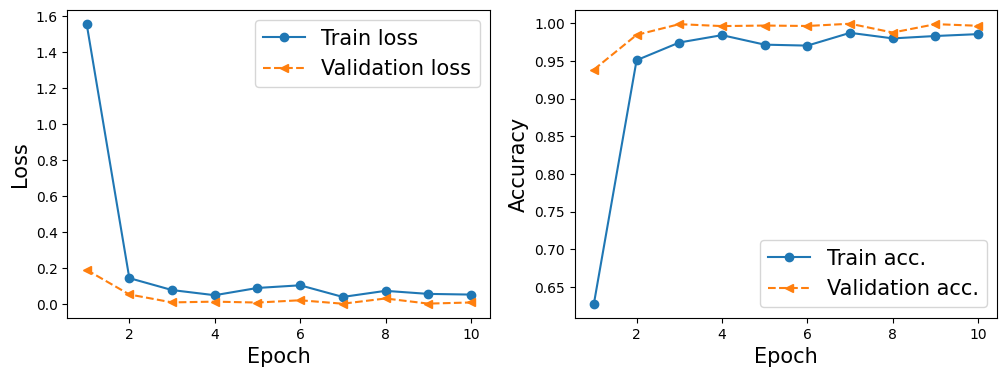

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist2[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist2[0], '-o', label='Train loss')
ax.plot(x_arr, hist2[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist2[2], '-o', label='Train acc.')
ax.plot(x_arr, hist2[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)


plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model2, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8636


## Model 3 - dodana kolejna warstwa ukryta z taką samą ilością neuronów jak pozostałe, zostawiamy ReLu

In [ ]:
model3 = nn.Sequential()
model3.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model3.add_module('relu1', nn.ReLU())
model3.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model3.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model3.add_module('relu2', nn.ReLU())
model3.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model3.add_module('flatten', nn.Flatten())

model3.add_module('fc1', nn.Linear(3136, 1024))
model3.add_module('relu3', nn.ReLU())
model3.add_module('dropout', nn.Dropout(p=0.25))

model3.add_module('fc2', nn.Linear(1024, 1024))
model3.add_module('relu4', nn.ReLU())

model3.add_module('fc3', nn.Linear(1024, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model3 = model3.to(device)

# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist3 = train(model3, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.6309 val_accuracy: 0.9821
Epoch 2 accuracy: 0.9709 val_accuracy: 0.9897
Epoch 3 accuracy: 0.9786 val_accuracy: 0.9886
Epoch 4 accuracy: 0.9874 val_accuracy: 0.9983
Epoch 5 accuracy: 0.9919 val_accuracy: 0.9911
Epoch 6 accuracy: 0.9832 val_accuracy: 0.9921
Epoch 7 accuracy: 0.9920 val_accuracy: 0.9871
Epoch 8 accuracy: 0.9861 val_accuracy: 0.9977
Epoch 9 accuracy: 0.9922 val_accuracy: 0.9969
Epoch 10 accuracy: 0.9890 val_accuracy: 0.9999


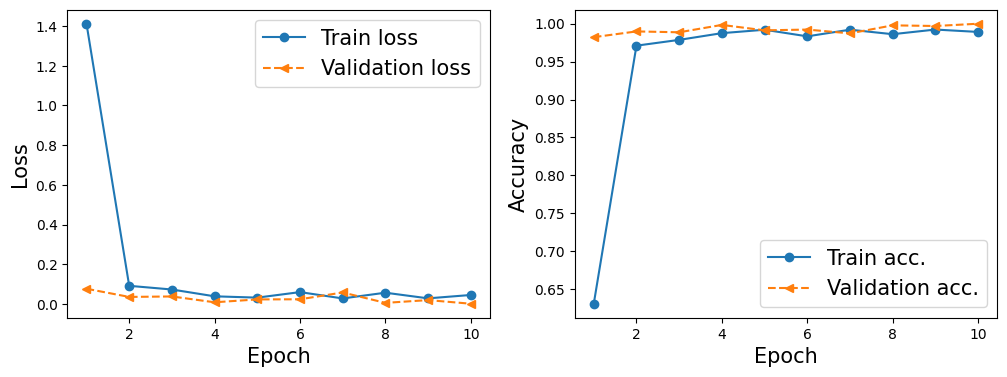

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist3[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist3[0], '-o', label='Train loss')
ax.plot(x_arr, hist3[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist3[2], '-o', label='Train acc.')
ax.plot(x_arr, hist3[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model3, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8774


## Model 4 - zmiana ReLu na Sigmoid

In [ ]:
model4 = nn.Sequential()
model4.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model4.add_module('sigmoid1', nn.Sigmoid())
model4.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model4.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model4.add_module('sigmoid2', nn.Sigmoid())
model4.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model4.add_module('flatten', nn.Flatten())

model4.add_module('fc1', nn.Linear(3136, 1024))
model4.add_module('relu3', nn.ReLU())
model4.add_module('dropout', nn.Dropout(p=0.25))

model4.add_module('fc2', nn.Linear(1024, 1024))
model4.add_module('relu4', nn.ReLU())

model4.add_module('fc3', nn.Linear(1024, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model4 = model4.to(device)

# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist4 = train(model4, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.0750 val_accuracy: 0.3051
Epoch 2 accuracy: 0.6573 val_accuracy: 0.8851
Epoch 3 accuracy: 0.8961 val_accuracy: 0.9649
Epoch 4 accuracy: 0.9528 val_accuracy: 0.9956
Epoch 5 accuracy: 0.9763 val_accuracy: 0.9964
Epoch 6 accuracy: 0.9817 val_accuracy: 1.0000
Epoch 7 accuracy: 0.9878 val_accuracy: 0.9994
Epoch 8 accuracy: 0.9878 val_accuracy: 0.9969
Epoch 9 accuracy: 0.9868 val_accuracy: 0.9997
Epoch 10 accuracy: 0.9834 val_accuracy: 0.9953


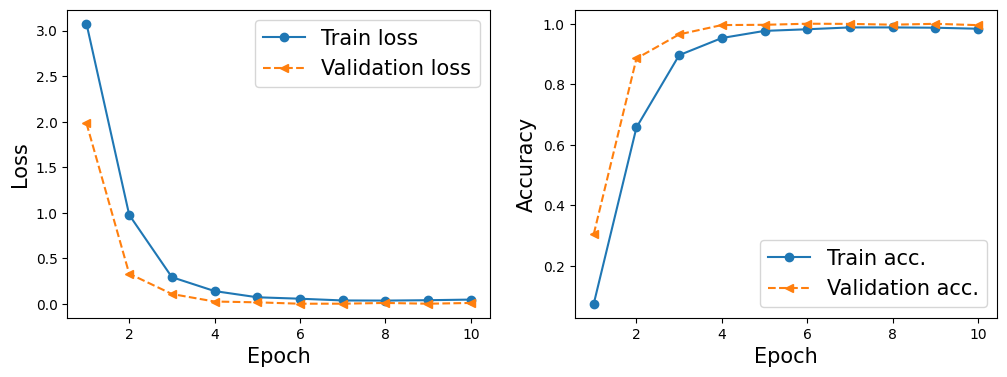

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist4[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist4[0], '-o', label='Train loss')
ax.plot(x_arr, hist4[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist4[2], '-o', label='Train acc.')
ax.plot(x_arr, hist4[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model4, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9182


## Model 5 - spróbujemy zmienic learning rate na 0.0001 w pierwszym modelu (model)

In [ ]:
model5 = nn.Sequential()
model5.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model5.add_module('relu1', nn.ReLU())
model5.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model5.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model5.add_module('relu2', nn.ReLU())
model5.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model5.add_module('flatten', nn.Flatten())

model5.add_module('fc1', nn.Linear(3136, 1024))
model5.add_module('relu3', nn.ReLU())
model5.add_module('dropout', nn.Dropout(p=0.5))

model5.add_module('fc2', nn.Linear(1024, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model5 = model5.to(device)

# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model5.parameters(), lr=0.00001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist5 = train(model5, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.2668 val_accuracy: 0.6641
Epoch 2 accuracy: 0.5885 val_accuracy: 0.8333
Epoch 3 accuracy: 0.7354 val_accuracy: 0.9224
Epoch 4 accuracy: 0.8258 val_accuracy: 0.9451
Epoch 5 accuracy: 0.8818 val_accuracy: 0.9760
Epoch 6 accuracy: 0.9257 val_accuracy: 0.9934
Epoch 7 accuracy: 0.9462 val_accuracy: 0.9973
Epoch 8 accuracy: 0.9661 val_accuracy: 0.9990
Epoch 9 accuracy: 0.9741 val_accuracy: 0.9994
Epoch 10 accuracy: 0.9826 val_accuracy: 0.9999


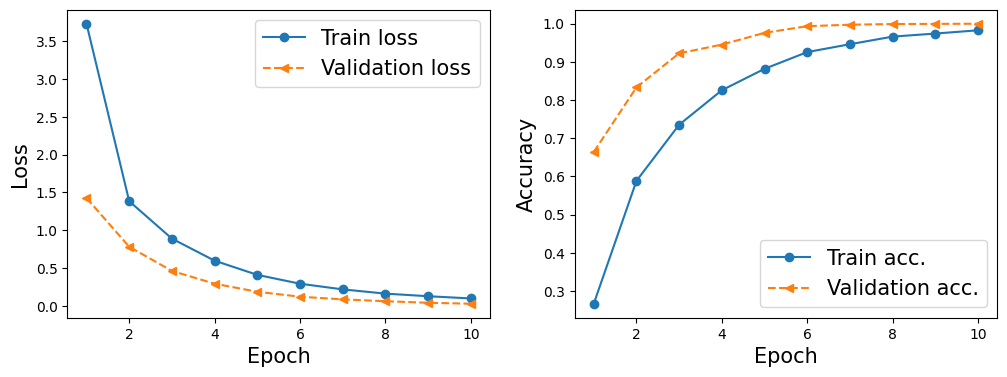

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist5[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist5[0], '-o', label='Train loss')
ax.plot(x_arr, hist5[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist5[2], '-o', label='Train acc.')
ax.plot(x_arr, hist5[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model5, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8965


## Model 6 - dodajemy kolejną warstwę ukrytą z taką samą ilością neuronów jak pozostałe, learning rate = 0.00001

In [ ]:
model6 = nn.Sequential()
model6.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model6.add_module('relu1', nn.ReLU())
model6.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model6.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model6.add_module('relu2', nn.ReLU())
model6.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model6.add_module('flatten', nn.Flatten())

model6.add_module('fc1', nn.Linear(3136, 1024))
model6.add_module('relu3', nn.ReLU())
model6.add_module('dropout', nn.Dropout(p=0.25))

model6.add_module('fc2', nn.Linear(1024, 1024))
model6.add_module('relu4', nn.ReLU())

model6.add_module('fc3', nn.Linear(1024, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model6 = model6.to(device)

# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model6.parameters(), lr=0.00001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist6 = train(model6, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.3005 val_accuracy: 0.6621
Epoch 2 accuracy: 0.6719 val_accuracy: 0.8406
Epoch 3 accuracy: 0.8231 val_accuracy: 0.9267
Epoch 4 accuracy: 0.8973 val_accuracy: 0.9459
Epoch 5 accuracy: 0.9420 val_accuracy: 0.9823
Epoch 6 accuracy: 0.9660 val_accuracy: 0.9931
Epoch 7 accuracy: 0.9813 val_accuracy: 0.9971
Epoch 8 accuracy: 0.9895 val_accuracy: 0.9990
Epoch 9 accuracy: 0.9940 val_accuracy: 1.0000
Epoch 10 accuracy: 0.9964 val_accuracy: 0.9999


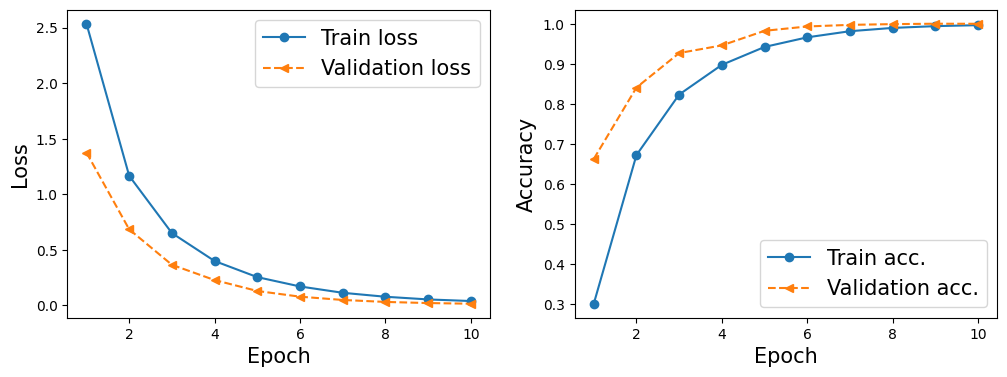

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist6[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist6[0], '-o', label='Train loss')
ax.plot(x_arr, hist6[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist6[2], '-o', label='Train acc.')
ax.plot(x_arr, hist6[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model6, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9152


## Model 7 - zmiana ReLu na Sigmoid

In [ ]:
model7 = nn.Sequential()
model7.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model7.add_module('sigmoid1', nn.Sigmoid())
model7.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model7.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model7.add_module('sigmoid2', nn.Sigmoid())
model7.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model7.add_module('flatten', nn.Flatten())

model7.add_module('fc1', nn.Linear(3136, 1024))
model7.add_module('relu3', nn.ReLU())
model7.add_module('dropout', nn.Dropout(p=0.25))

model7.add_module('fc2', nn.Linear(1024, 1024))
model7.add_module('relu4', nn.ReLU())

model7.add_module('fc3', nn.Linear(1024, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model7 = model7.to(device)

# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model7.parameters(), lr=0.00001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist7 = train(model7, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.0456 val_accuracy: 0.0420
Epoch 2 accuracy: 0.0478 val_accuracy: 0.0496
Epoch 3 accuracy: 0.0505 val_accuracy: 0.0496
Epoch 4 accuracy: 0.0533 val_accuracy: 0.0654
Epoch 5 accuracy: 0.0699 val_accuracy: 0.0964
Epoch 6 accuracy: 0.1287 val_accuracy: 0.2371
Epoch 7 accuracy: 0.2568 val_accuracy: 0.3597
Epoch 8 accuracy: 0.3831 val_accuracy: 0.5006
Epoch 9 accuracy: 0.4956 val_accuracy: 0.5834
Epoch 10 accuracy: 0.5634 val_accuracy: 0.6181


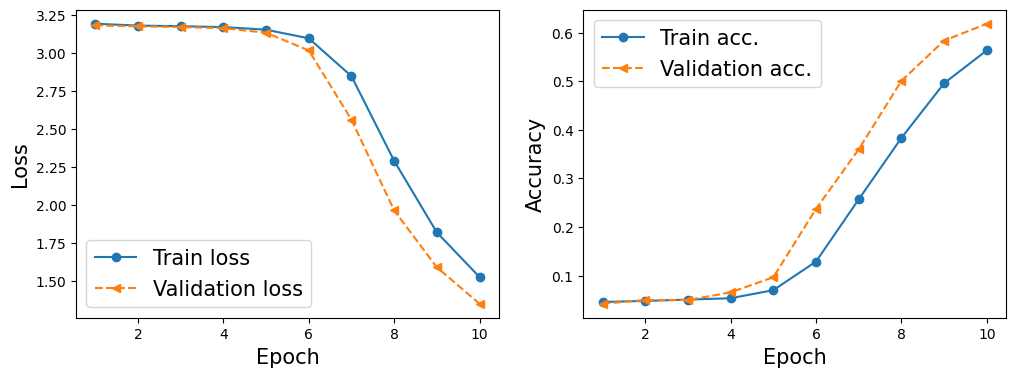

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist7[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist7[0], '-o', label='Train loss')
ax.plot(x_arr, hist7[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist7[2], '-o', label='Train acc.')
ax.plot(x_arr, hist7[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model7, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.5956


## Model 8 - sprobujemy dac sigmoid tylko po 2 warstwie konwolucyjnej

In [ ]:
model8 = nn.Sequential()
model8.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model8.add_module('relu1', nn.ReLU())
model8.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model8.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model8.add_module('sigmoid2', nn.Sigmoid())
model8.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model8.add_module('flatten', nn.Flatten())

model8.add_module('fc1', nn.Linear(3136, 1024))
model8.add_module('relu3', nn.ReLU())
model8.add_module('dropout', nn.Dropout(p=0.25))

model8.add_module('fc2', nn.Linear(1024, 1024))
model8.add_module('relu4', nn.ReLU())

model8.add_module('fc3', nn.Linear(1024, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model8 = model8.to(device)

# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model8.parameters(), lr=0.00001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist8 = train(model8, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.1413 val_accuracy: 0.3561
Epoch 2 accuracy: 0.3842 val_accuracy: 0.5669
Epoch 3 accuracy: 0.5562 val_accuracy: 0.6599
Epoch 4 accuracy: 0.6700 val_accuracy: 0.7326
Epoch 5 accuracy: 0.7411 val_accuracy: 0.8053
Epoch 6 accuracy: 0.7914 val_accuracy: 0.8496
Epoch 7 accuracy: 0.8349 val_accuracy: 0.8694
Epoch 8 accuracy: 0.8630 val_accuracy: 0.8941
Epoch 9 accuracy: 0.8903 val_accuracy: 0.9113
Epoch 10 accuracy: 0.9122 val_accuracy: 0.9371


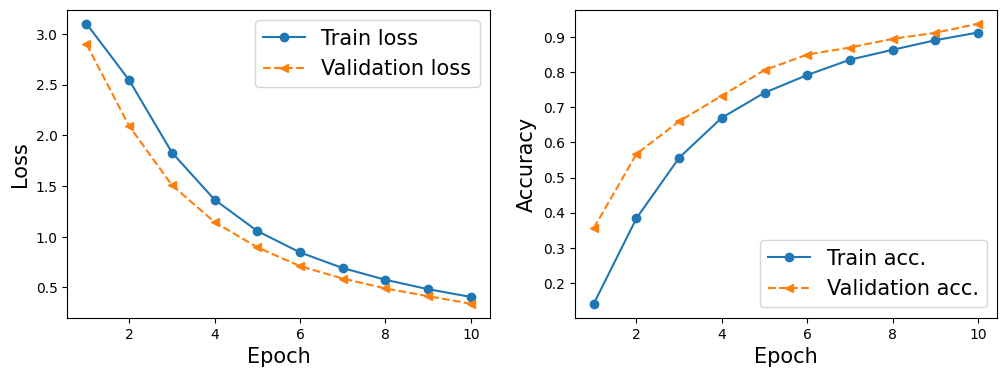

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist8[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist8[0], '-o', label='Train loss')
ax.plot(x_arr, hist8[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist8[2], '-o', label='Train acc.')
ax.plot(x_arr, hist8[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model8, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.8228


### Wnioski: zmiana learning rate nie dała lepszych wyników, więc wracamy do mniejszego learning rate i spróbujemy jeszcze coś zmodyfikować

## Model 9 - model 3 + zmniejszenie liczby neuronów w warstwach ukrytych

In [ ]:
model9 = nn.Sequential()
model9.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model9.add_module('relu1', nn.ReLU())
model9.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model9.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model9.add_module('relu2', nn.ReLU())
model9.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model9.add_module('flatten', nn.Flatten())

model9.add_module('fc1', nn.Linear(3136, 512))
model9.add_module('relu3', nn.ReLU())
model9.add_module('dropout', nn.Dropout(p=0.25))

model9.add_module('fc2', nn.Linear(512, 512))
model9.add_module('relu4', nn.ReLU())

model9.add_module('fc3', nn.Linear(512, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model9 = model9.to(device)

# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model9.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist9 = train(model9, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.7533 val_accuracy: 0.9840
Epoch 2 accuracy: 0.9758 val_accuracy: 0.9984
Epoch 3 accuracy: 0.9870 val_accuracy: 0.9916
Epoch 4 accuracy: 0.9884 val_accuracy: 0.9964
Epoch 5 accuracy: 0.9814 val_accuracy: 0.9997
Epoch 6 accuracy: 0.9871 val_accuracy: 0.9926
Epoch 7 accuracy: 0.9907 val_accuracy: 1.0000
Epoch 8 accuracy: 0.9977 val_accuracy: 0.9926
Epoch 9 accuracy: 0.9832 val_accuracy: 0.9993
Epoch 10 accuracy: 0.9926 val_accuracy: 1.0000


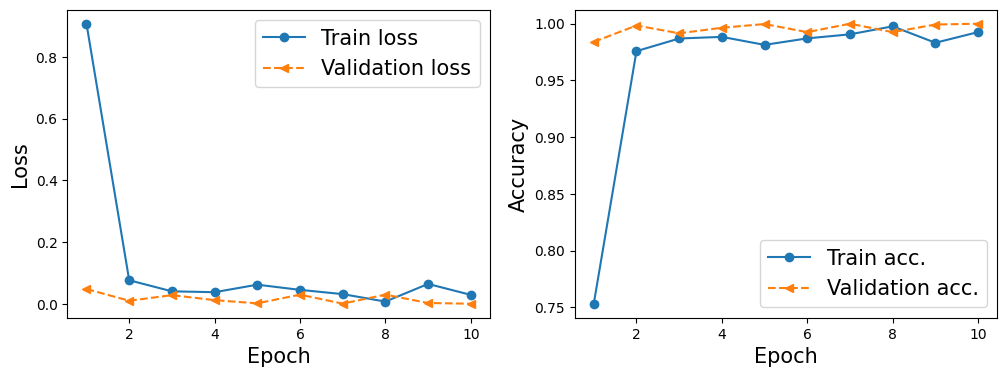

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist9[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist9[0], '-o', label='Train loss')
ax.plot(x_arr, hist9[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist9[2], '-o', label='Train acc.')
ax.plot(x_arr, hist9[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model9, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9165


## Model 10 - model 4 + zmniejszenie liczby neuronów w warstwach ukrytych

In [ ]:
model10 = nn.Sequential()
model10.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model10.add_module('sigmoid1', nn.Sigmoid())
model10.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model10.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model10.add_module('sigmoid2', nn.Sigmoid())
model10.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model10.add_module('flatten', nn.Flatten())

model10.add_module('fc1', nn.Linear(3136, 512))
model10.add_module('relu3', nn.ReLU())
model10.add_module('dropout', nn.Dropout(p=0.25))

model10.add_module('fc2', nn.Linear(512, 512))
model10.add_module('relu4', nn.ReLU())

model10.add_module('fc3', nn.Linear(512, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model10 = model10.to(device)

# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model10.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist10 = train(model10, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.1260 val_accuracy: 0.4753
Epoch 2 accuracy: 0.7369 val_accuracy: 0.9356
Epoch 3 accuracy: 0.9371 val_accuracy: 0.9946
Epoch 4 accuracy: 0.9774 val_accuracy: 0.9976
Epoch 5 accuracy: 0.9893 val_accuracy: 0.9990
Epoch 6 accuracy: 0.9908 val_accuracy: 0.9967
Epoch 7 accuracy: 0.9857 val_accuracy: 0.9971
Epoch 8 accuracy: 0.9924 val_accuracy: 0.9990
Epoch 9 accuracy: 0.9924 val_accuracy: 0.9986
Epoch 10 accuracy: 0.9875 val_accuracy: 0.9987


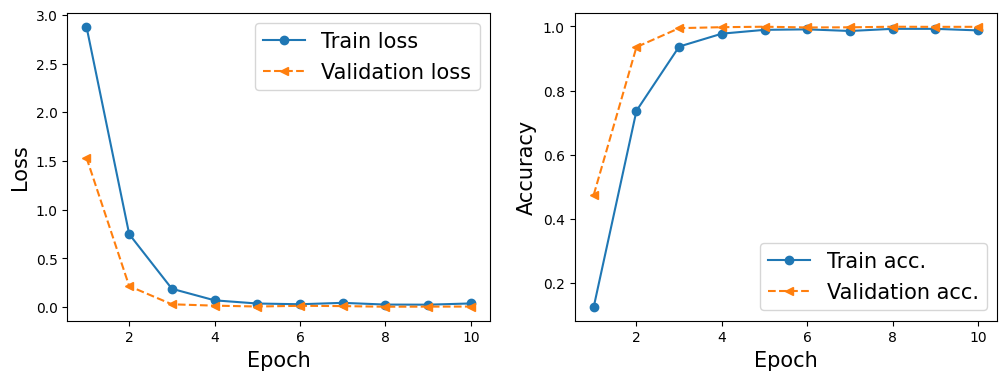

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist10[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist10[0], '-o', label='Train loss')
ax.plot(x_arr, hist10[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist10[2], '-o', label='Train acc.')
ax.plot(x_arr, hist10[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model10, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9159


## Model 11 - model 10 ze zmianą optymalizatora na SGD

In [ ]:
model11 = nn.Sequential()
model11.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model11.add_module('sigmoid1', nn.Sigmoid())
model11.add_module('pool1', nn.MaxPool2d(kernel_size=2))
model11.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model11.add_module('sigmoid2', nn.Sigmoid())
model11.add_module('pool2', nn.MaxPool2d(kernel_size=2))

# warstwa spłaszczająca
model11.add_module('flatten', nn.Flatten())

model11.add_module('fc1', nn.Linear(3136, 512))
model11.add_module('relu3', nn.ReLU())
model11.add_module('dropout', nn.Dropout(p=0.25))

model11.add_module('fc2', nn.Linear(512, 512))
model11.add_module('relu4', nn.ReLU())

model11.add_module('fc3', nn.Linear(512, 25))  # 25 dla 25 etykiet

device = torch.device("cpu")

model11 = model11.to(device)

# Wybieramy funkcję straty oraz optymalizator
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model11.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(1)

num_epochs = 10
hist11 = train(model11, num_epochs, train_loader, valid_loader)

Epoch 1 accuracy: 0.0428 val_accuracy: 0.0471
Epoch 2 accuracy: 0.0460 val_accuracy: 0.0419
Epoch 3 accuracy: 0.0447 val_accuracy: 0.0419
Epoch 4 accuracy: 0.0447 val_accuracy: 0.0616
Epoch 5 accuracy: 0.0459 val_accuracy: 0.0621
Epoch 6 accuracy: 0.0436 val_accuracy: 0.0579
Epoch 7 accuracy: 0.0485 val_accuracy: 0.0524
Epoch 8 accuracy: 0.0467 val_accuracy: 0.0464
Epoch 9 accuracy: 0.0470 val_accuracy: 0.0464
Epoch 10 accuracy: 0.0471 val_accuracy: 0.0464


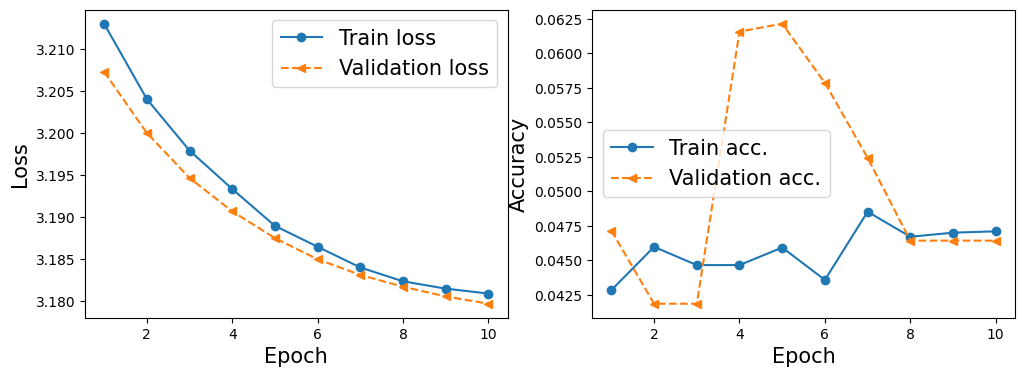

In [ ]:
# Wykresy krzywych uczenia
import matplotlib.pyplot as plt
import numpy as np

x_arr = np.arange(len(hist11[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist11[0], '-o', label='Train loss')
ax.plot(x_arr, hist11[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist11[2], '-o', label='Train acc.')
ax.plot(x_arr, hist11[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model11, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.0201


### Porównanie dokładności

In [ ]:
import tabulate
from IPython.display import HTML

data = [["MODEL", "test acc "],
        ["bazowy", 87.16],
        ["model1", 2.01],
        ["model2", 86.36],
        ["model3", 87.74],
        ["model4", 91.82],
        ["model5", 89.65],
        ["model6", 91.52],
        ["model7", 59.56],
        ["model8", 82.28],
        ["model9", 91.65],
        ["model10", 91.59],
        ["model11", 2.01]]

table = tabulate.tabulate(data, tablefmt='html')
HTML(table)

MODEL,test acc
bazowy,87.16
model1,2.01
model2,86.36
model3,87.74
model4,91.82
model5,89.65
model6,91.52
model7,59.56
model8,82.28
model9,91.65


### Wybrany model - model10: dokładność, 12 przykładów ze zbioru wraz z predykcjami oraz przykłady (wybrane ze zbioru testowego), które zostały sklasyfikowane błędnie:

In [ ]:
# Wywołanie funkcji na zbiorze testowym
test_loss, test_accuracy = evaluate(model10, test_loader)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9159


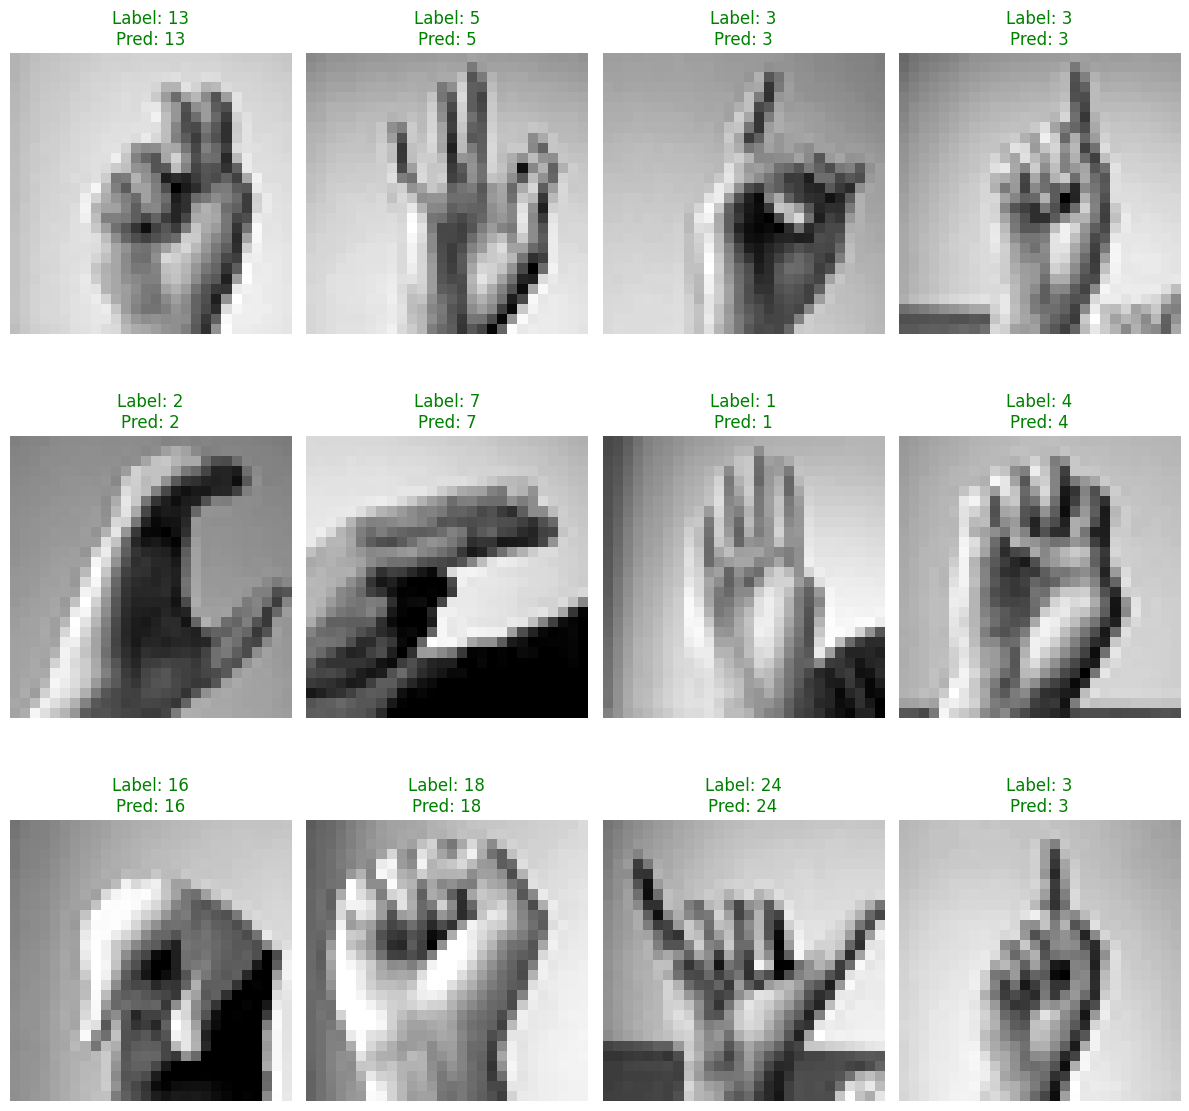

In [ ]:
def show_images(images, labels, preds):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        color = 'green' if labels[i] == preds[i] else 'red'
        plt.title(f"Label: {labels[i]}\nPred: {preds[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

indices = np.random.choice(len(X_test), 12, replace=False)
sample_images = X_test_tensor[indices].to(device)
sample_labels = y_test_tensor[indices].cpu().numpy()

model10.eval()
with torch.no_grad():
    outputs = model10(sample_images)
    _, preds = torch.max(outputs, 1)
    preds = preds.cpu().numpy()

show_images(sample_images.cpu(), sample_labels, preds)

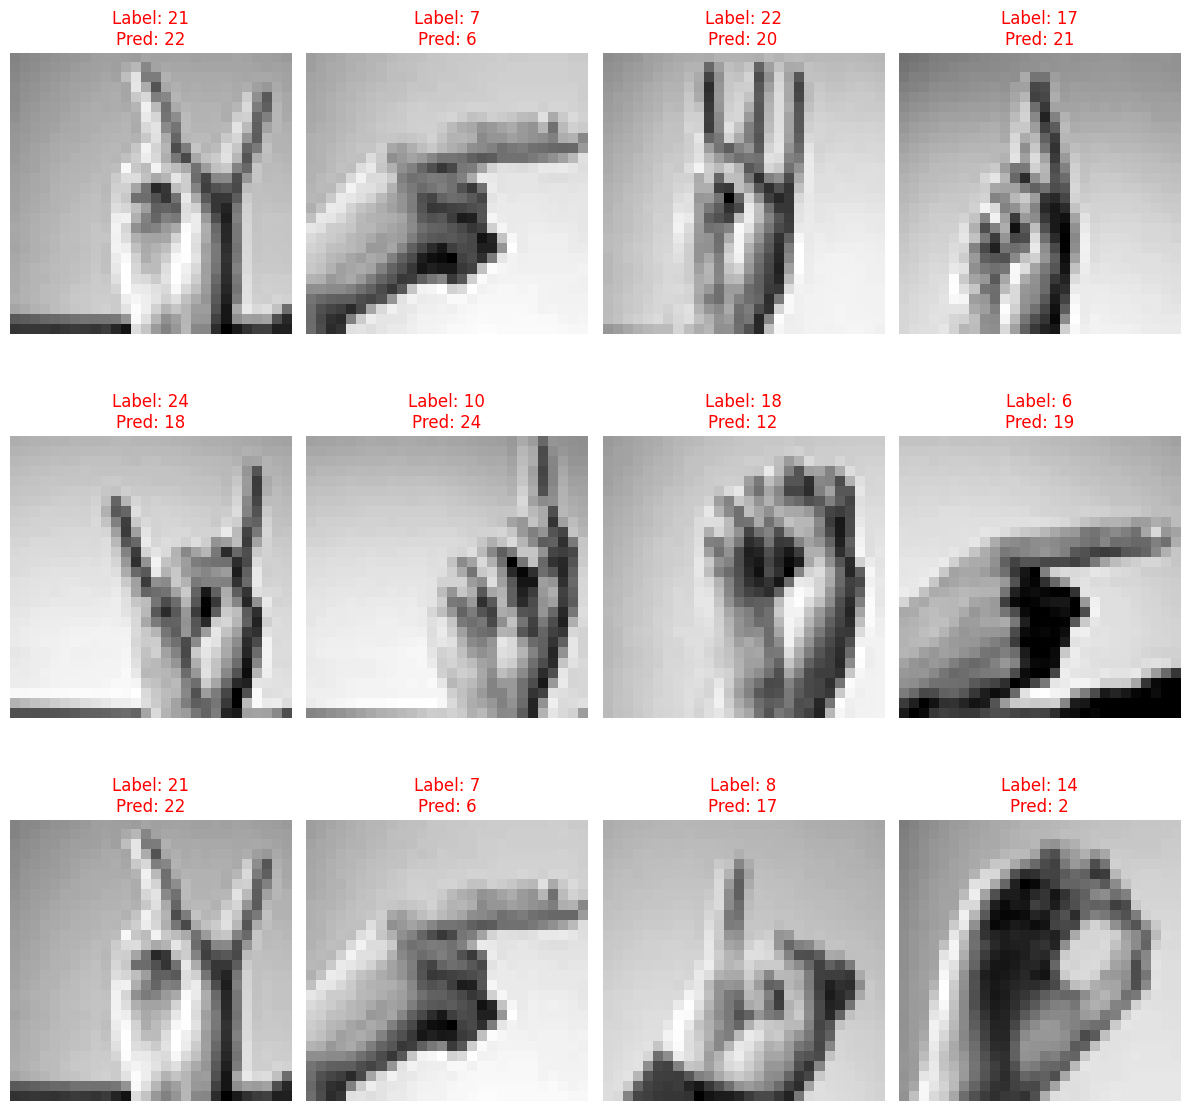

In [ ]:
def show_images(images, labels, preds):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        color = 'green' if labels[i] == preds[i] else 'red'
        plt.title(f"Label: {labels[i]}\nPred: {preds[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def show_misclassified_images(model, data_loader):
    model.eval()
    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            misclassified_indices = (preds != labels).nonzero(as_tuple=True)[0]

            misclassified_images.extend(images[misclassified_indices].cpu())
            misclassified_labels.extend(labels[misclassified_indices].cpu())
            misclassified_preds.extend(preds[misclassified_indices].cpu())

            if len(misclassified_images) >= 12:
                break

    show_images(misclassified_images[:12], misclassified_labels[:12], misclassified_preds[:12])

show_misclassified_images(model10, test_loader)